<div style="background-color:lightpink; text-align:center; padding:8px; border-radius:3px;">
    <span style="font-size:20px; font-weight:bold;">
        Programming in Python - Final Project
    </span>
</div>

<div style="text-align:justify; padding:10px; border-radius:5px;">
    <span style="font-size:12px;">
In this notebook, I conducted an Exploratory Data Analysis (EDA) of the Airbnb Listings Dataset, a comprehensive compilation of data related to 7566 Airbnb listings. This dataset has a big array of both quantitative and qualitative variables, totaling 75 columns (including information such as listing details, host profiles, geographical data, property types, room types, pricing, availability, and reviews).
    </span>
</div>

<div style="background-color:lightblue; font-size:18px; color:black; margin-bottom:10px;">
    <b> Understanding the dataset:</b>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("airbnb_listings.csv")

In [3]:
missing_data = df.isnull().sum()
missing_perc = (missing_data[missing_data>0]/df.shape[0])*100 # Missing data percentage
missing_perc.sort_values(ascending=False)

license                         100.000000
neighbourhood_group_cleansed    100.000000
bathrooms                       100.000000
calendar_updated                100.000000
host_about                       53.000264
host_response_time               48.030663
host_response_rate               48.030663
host_acceptance_rate             44.607454
neighborhood_overview            44.567803
neighbourhood                    44.567803
host_neighbourhood               30.822099
review_scores_value              19.653714
review_scores_checkin            19.627280
review_scores_location           19.627280
review_scores_accuracy           19.574412
review_scores_communication      19.574412
review_scores_cleanliness        19.561195
first_review                     17.935501
last_review                      17.935501
review_scores_rating             17.935501
reviews_per_month                17.935501
host_location                    17.631509
bedrooms                          2.709490
description

In [4]:
# Dropping columns with high perc of missing data (>40%)
data_drop = missing_perc[missing_perc == 100].index
df_cleaned = df.drop(columns=data_drop)
columns_with_high_missing_data = ['host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                                  'neighborhood_overview', 'neighbourhood', 'host_neighbourhood']
df_cleaned.drop(columns=columns_with_high_missing_data, inplace=True)

In [5]:
# For others columns with missing data, replacing the missing values with the mean or median
review_columns = ['review_scores_value', 'review_scores_checkin', 'review_scores_location', 'review_scores_accuracy',
                  'review_scores_communication', 'review_scores_cleanliness', 'review_scores_rating', 'reviews_per_month']
for col in review_columns:
    df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

# For columns with minimal missing data, we use median for numerical columns
df_cleaned['bedrooms'].fillna(df_cleaned['bedrooms'].median(), inplace=True)
df_cleaned['beds'].fillna(df_cleaned['beds'].median(), inplace=True)

In [6]:
# Checking my dataset after cleaning
df_cleaned.isnull().sum().sort_values(ascending=False).head(6) # Displaying the top 6 columns with missing data after cleaning


last_review               1357
first_review              1357
host_location             1334
description                155
bathrooms_text               4
minimum_maximum_nights       0
dtype: int64

In [7]:
numer_key_vars = ['price','accommodates','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating',
                  'bedrooms', 'beds']
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

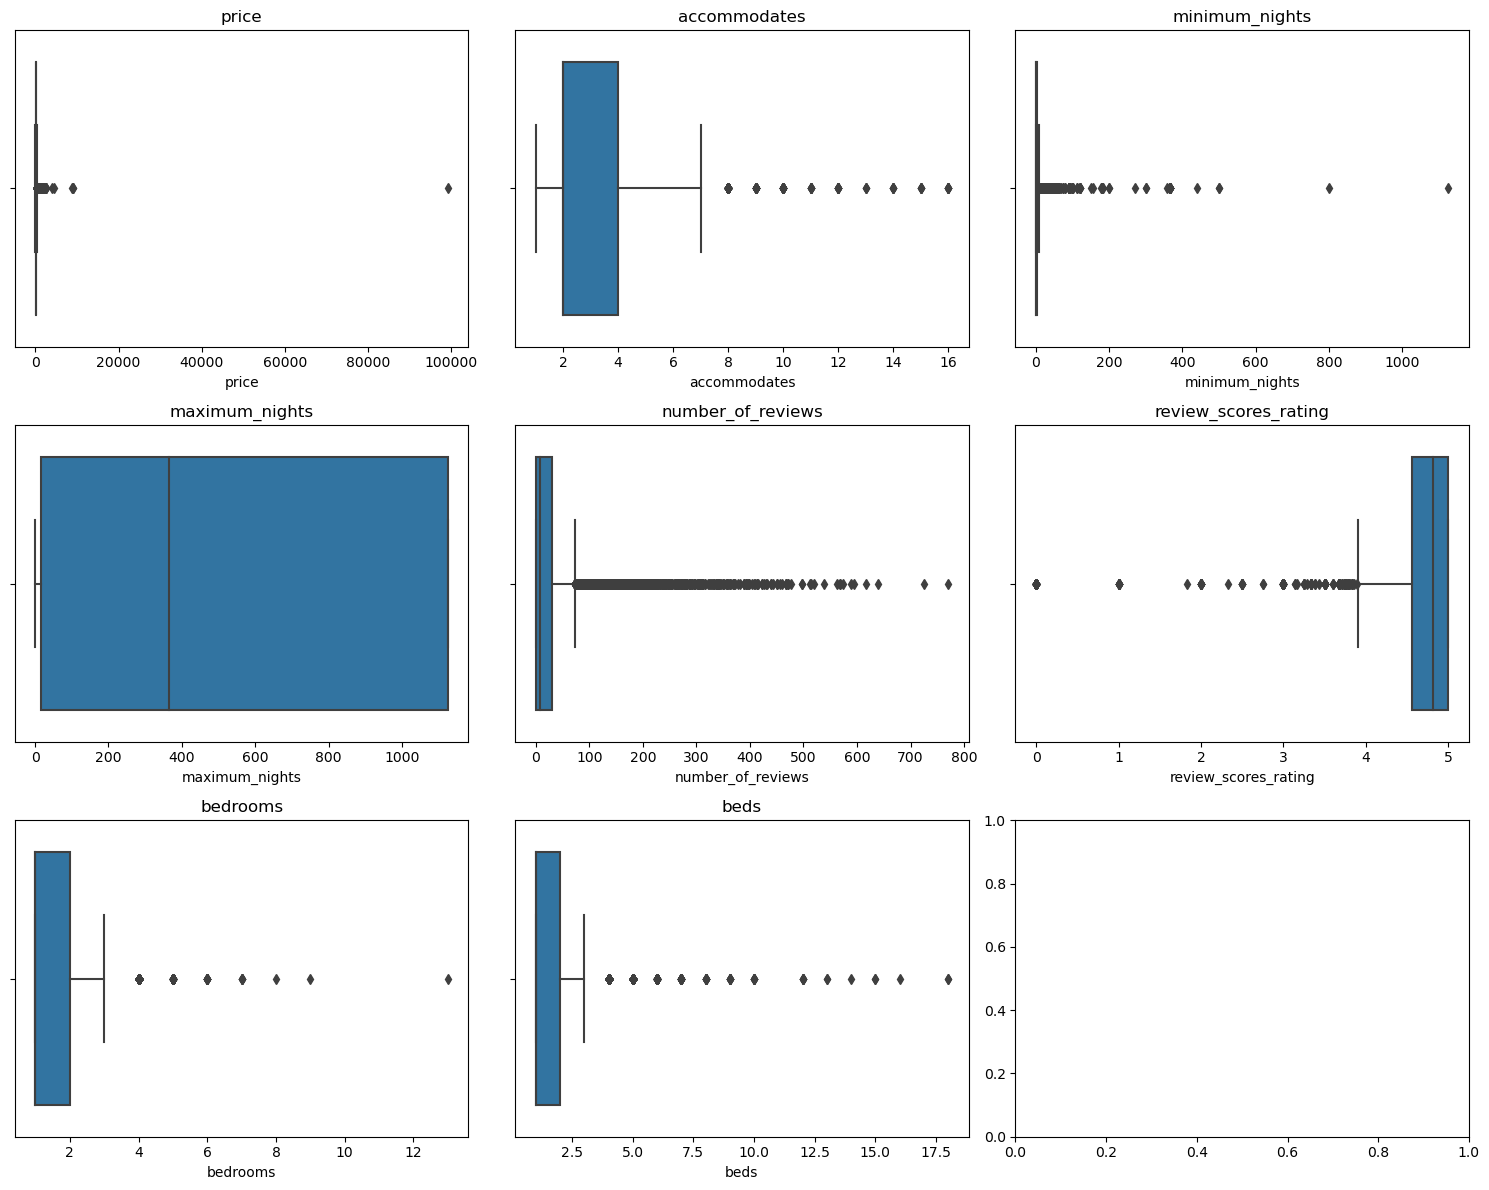

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, col in enumerate(numer_key_vars):
    sns.boxplot(x=df[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col}')
    axes[i//3, i%3].set_xlabel(col)
plt.tight_layout()
plt.show()

#### Some insights:
- `Price:` the majority of listings are priced at the lower end of the scale with a median price below 20,000.
- `Accommodates:`Most listings accommodate 2-4 guests, with a median around 3. There are a few outliers that can accommodate a  higher number of guests
- `Minimum Nights:` Listings typically require a short minimum stay, with the median close to 1 or 2 nights
- `Maximum Nights:` The data for maximum nights is highly concentrated at the lower end, with the majority of listings allowing stays of 1000 nights or less
- `Number of Reviews:`The number of reviews is skewed towards a lower number, with many listings having few reviews
- `Review Scores Rating:` Ratings are generally high, with the median close to the maximum score of 5
- `Bedrooms:` Most listings offer 1 to 2 bedrooms. There are listings with up to 12 bedrooms (outliers)

In [9]:
total_columns = df_cleaned.shape[1]
num_categorical = df_cleaned.select_dtypes(include=['object']).shape[1]
num_numerical = df_cleaned.select_dtypes(include=['number']).shape[1]
columns_with_null = df_cleaned.isnull().any().sum()
total_missing_values = df_cleaned.isnull().sum().sum()
columns_most_missing = df_cleaned.isnull().sum().idxmax()

# Creating a summary table
summary_table = pd.DataFrame({
    "Number of Variables": [total_columns],
    "Categorical Vars": [num_categorical],
    "Numerical Vars": [num_numerical],
    "Columns with Null Values": [columns_with_null],
    "Total missing values": [total_missing_values],
    "Column with Most Missing Values": [columns_most_missing]})

print('Summary_table:')
summary_table

Summary_table:


,Number of Variables,Categorical Vars,Numerical Vars,Columns with Null Values,Total missing values,Column with Most Missing Values
0,64,27,37,5,4207,first_review


<div style="background-color:lightblue; font-size:18px; color:black; margin-bottom:10px;">
    <b>  Trends in the dataset:</b>
</div>

### Potential trends:
> - 1. Relationship between 'price' and 'number_of_reviews'
> - 2. Impact of 'room_type' on 'availability_365'
> - 3. Correlation between 'review_scores_rating' and 'reviews_per_month'
> - 4. Distribution of 'price' in different 'neighbourhood_cleansed'
> - 5. Trend of 'accommodates' with respect to 'bedrooms'

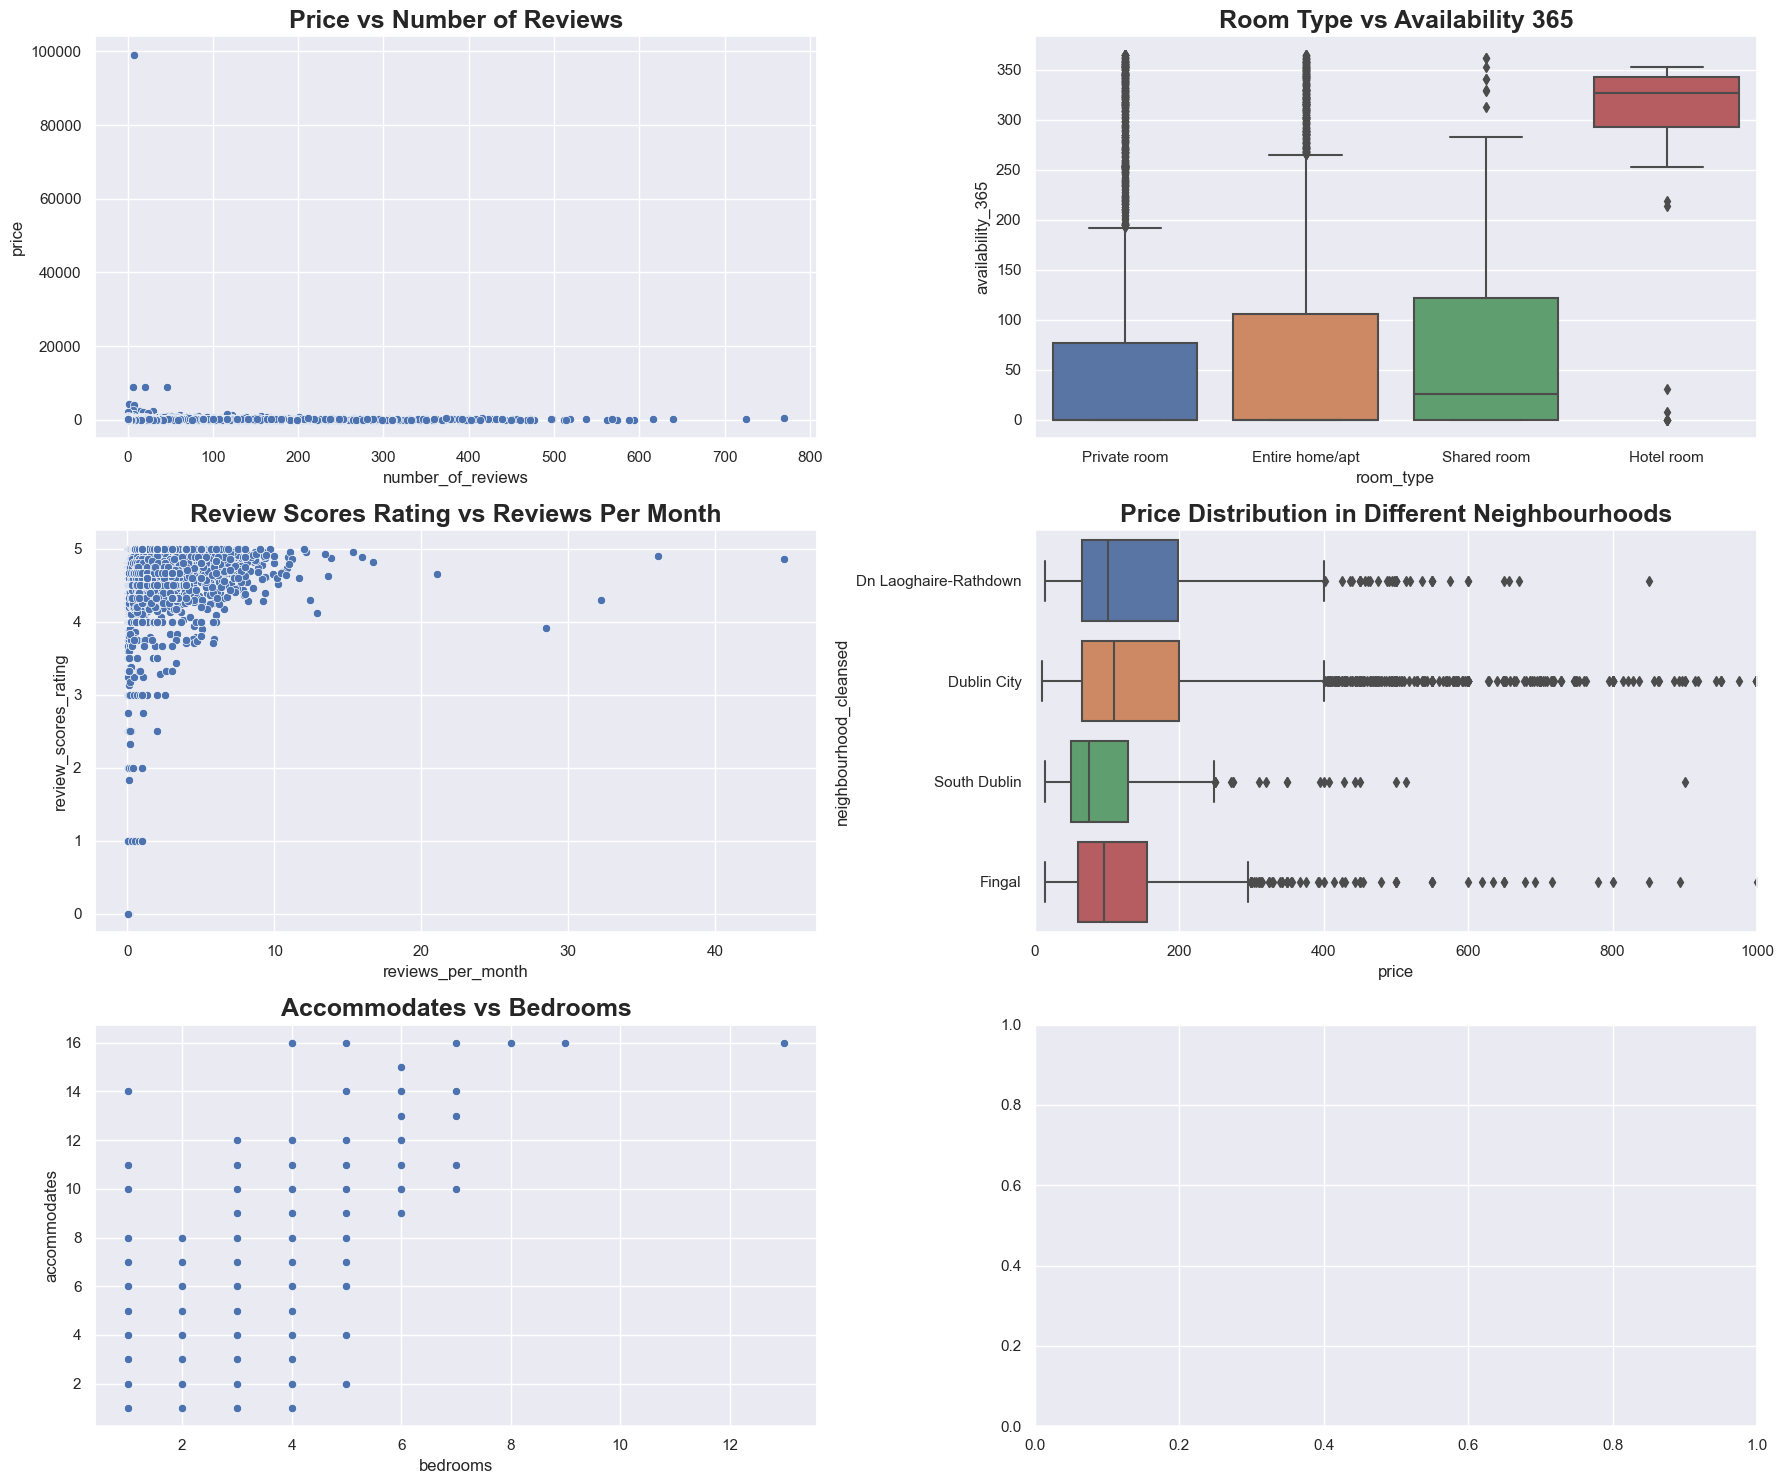

In [10]:
sns.set(style="darkgrid")
df_cleaned['price'] = df_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Trend 1: Price vs Number of Reviews
sns.scatterplot(data=df_cleaned, x='number_of_reviews', y='price', ax=axes[0, 0])
axes[0, 0].set_title('Price vs Number of Reviews', fontsize='18', fontweight='bold')

# Trend 2: Room Type vs Availability 365
sns.boxplot(data=df_cleaned, x='room_type', y='availability_365', ax=axes[0, 1])
axes[0, 1].set_title('Room Type vs Availability 365', fontsize='18', fontweight='bold')

# Trend 3: Review Scores Rating vs Reviews Per Month
sns.scatterplot(data=df_cleaned, x='reviews_per_month', y='review_scores_rating', ax=axes[1, 0])
axes[1, 0].set_title('Review Scores Rating vs Reviews Per Month', fontsize='18', fontweight='bold')

# Trend 4: Price Distribution in Different Neighbourhoods
sns.boxplot(data=df_cleaned, x='price', y='neighbourhood_cleansed', ax=axes[1, 1])
axes[1, 1].set_title('Price Distribution in Different Neighbourhoods', fontsize='18', fontweight='bold')
axes[1, 1].set_xlim(0, 1000)

# Trend 5: Accommodates vs Bedrooms
sns.scatterplot(data=df_cleaned, x='bedrooms', y='accommodates', ax=axes[2, 0])
axes[2, 0].set_title('Accommodates vs Bedrooms', fontsize='18', fontweight='bold')

plt.tight_layout()
plt.show()

**`Trend 1. Price vs Number of Reviews:`** The trend suggests that more frequently reviewed listings are generally priced moderately. This could indicate that competitively priced listings attract more guests, leading to more reviews. The scatterplot reveals a concentration of listings with a high number of reviews in the lower to mid-price range, suggesting a sweet spot in pricing that balances affordability with appeal.

**`Trend 2. Room Type vs Availability 365:`** the boxplot categorizes listings by room type and displays their availability throughout the year. Different room types show varying patterns of availability throughout the year. The boxplot reveals that hotel rooms, on average, have higher availability, potentially due to professional management and higher turnover rates. Entire homes/apartments and private rooms have similar levels of availability, possibly reflecting a mix of short-term and long-term rentals. Shared rooms show varied availability, which might be influenced by the niche market they serve.

**`Trend 3. Review Scores Rating vs Reviews Per Month:`** The scatterplot here shows the correlation between the average review scores a listing receives and the number of reviews per month. The relationship between review scores and the frequency of reviews per month is intriguing. High review scores do not necessarily correlate with a high frequency of reviews, suggesting that factors beyond guest satisfaction, such as pricing, location, and listing visibility, might influence the number of reviews. This trend indicates that while high satisfaction is important, it's not the sole driver of review frequency.

**`Trend 4. Price Distribution in Different Neighbourhoods:`** This plot compares the price distribution across different neighborhoods. The price variability across neighborhoods highlights the influence of location on pricing strategies. Some areas have a higher average price, reflecting their desirability or premium offerings. The range of prices within each neighborhood also speaks to the diversity of accommodations available, from budget-friendly options to luxury stays. This trend underscores the importance of location in determining rental prices.

**`Trend 5. Accommodates vs Bedrooms:`** The correlation between the number of people a listing accommodates and the number of bedrooms reveals insights into space utilization. There is a general trend where more bedrooms correspond to a higher accommodation capacity. However, the variation within each bedroom category suggests flexibility in how space is used, such as through convertible living spaces or multi-purpose rooms.

In [11]:
# Statistical analysis
trend1_stats = df_cleaned[['price', 'number_of_reviews']].describe()
trend2_stats = df_cleaned.groupby('room_type')['availability_365'].describe()
trend3_stats = df_cleaned[['review_scores_rating', 'reviews_per_month']].describe()
trend4_stats = df_cleaned.groupby('neighbourhood_cleansed')['price'].describe()
trend5_stats = df_cleaned[['accommodates', 'bedrooms']].describe()

print(trend1_stats,'\n','-'*50,'\n',trend2_stats,'\n','-'*50,'\n',trend3_stats,'\n','-'*50,'\n')
print(trend4_stats,'\n','-'*50,'\n',trend5_stats)

              price  number_of_reviews
count   7566.000000        7566.000000
mean     182.327953          32.141554
std     1170.750214          65.581141
min       10.000000           0.000000
25%       65.000000           1.000000
50%      105.000000           7.000000
75%      192.750000          30.000000
max    99149.000000         770.000000 
 -------------------------------------------------- 
                   count        mean         std  min    25%    50%     75%  \
room_type                                                                    
Entire home/apt  3786.0   66.484152  105.762963  0.0    0.0    0.0  106.00   
Hotel room         42.0  269.500000  123.260036  0.0  293.0  326.5  342.25   
Private room     3563.0   60.618580  103.564803  0.0    0.0    0.0   77.00   
Shared room       175.0   64.354286   85.362177  0.0    0.0   26.0  122.00   

                   max  
room_type               
Entire home/apt  365.0  
Hotel room       353.0  
Private room     365.0  


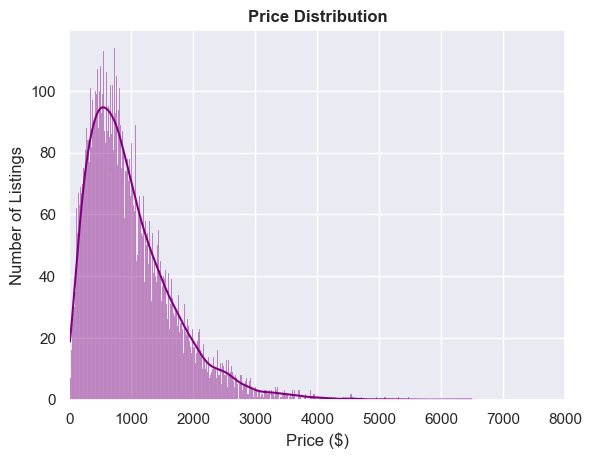

In [12]:
# Aditional analysis
np.random.seed(0)
data = {'price': np.random.gamma(shape=2., scale=500., size=10000)}
bin_size = 500
max_price_limit = 8000
sns.histplot(data['price'], bins=bin_size, kde=True, color='purple')
plt.title('Price Distribution', fontweight='bold')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, max_price_limit)
plt.grid(True)
plt.show()

**`Price Distribution:`**
- The price distribution is right-skewed, meaning that the majority of Airbnb listings are priced lower, with a few listings having much higher prices. Moreover, there is a significant spike in the number of listings at the lower end of the price spectrum, showing a popular price range where most hosts are listing their properties.